#📌 Extracción

In [258]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
#importar URL y cargar los datos desde Json
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [260]:
# Expandir columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Eliminar columnas originales del DataFrame principal
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Unir los DataFrames
df_datos = pd.concat([customer_df, phone_df, internet_df, account_df, df], axis=1)

# Mostrar primeras 5 filas del DataFrame final
df_datos.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0002-ORFBO,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0003-MKNFE,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,0013-EXCHZ,Yes


In [261]:
#tipos de datos
df_datos.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [262]:
#Validar nulos
df_datos.isnull().sum().sort_values(ascending=False)

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [263]:
df_datos.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [264]:
df_datos.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [265]:
# Revisar valores únicos para ver si hay cosas raras (como espacios vacíos)
print("Valores únicos antes de convertir:")
print(df_datos['Charges.Total'].unique()[:10])  # Mostrar algunos

# Reemplazar espacios vacíos por NaN y convertir a float
df_datos['Charges.Total'] = pd.to_numeric(df_datos['Charges.Total'], errors='coerce')

# Confirmar tipo de dato final
print("\nTipo de dato después de la conversión:")
print(df_datos['Charges.Total'].dtypes)

# Ver cuántos NaN resultaron de la conversión
print("\nCantidad de valores nulos en 'Charges.Total' tras conversión:")
print(df_datos['Charges.Total'].isnull().sum())


Valores únicos antes de convertir:
['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']

Tipo de dato después de la conversión:
float64

Cantidad de valores nulos en 'Charges.Total' tras conversión:
11


In [266]:
#Validar nulos
df_datos.isnull().sum().sort_values(ascending=False)

,0
Charges.Total,11
SeniorCitizen,0
Partner,0
Dependents,0
gender,0
tenure,0
PhoneService,0
InternetService,0
MultipleLines,0
OnlineBackup,0


In [267]:
# Reemplazar NaN por 0 en Charges.Total
df_datos['Charges.Total'] = df_datos['Charges.Total'].fillna(0)

# Confirmar que ya no hay nulos
print("Valores nulos restantes en 'Charges.Total':", df_datos['Charges.Total'].isnull().sum())


Valores nulos restantes en 'Charges.Total': 0


In [268]:
# seleccionar los registros que tienen Churn = ''
df_datos[df_datos['Churn'] == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
30,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,0047-ZHDTW,
75,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0120-YZLQA,
96,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,...,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,0154-QYHJU,
98,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,0162-RZGMZ,
175,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,0274-VVQOQ,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,...,No,No,No,One year,Yes,Mailed check,54.25,773.20,9840-GSRFX,
7180,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,...,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,9872-RZQQB,
7211,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,9920-GNDMB,
7239,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,9955-RVWSC,


In [269]:
# hay 224 registros en con un valor vacio lo cual corresponde a solo un 3% del total, por ende no debiese afectar el analisis global, se procede a eliminar los registros
df_datos = df_datos[df_datos['Churn'] != '']

In [270]:
# Conteo total de valores nulos por columna
valores_nulos = df_datos.isnull().sum()
valores_nulos[valores_nulos > 0]

,0


In [271]:
# Buscar registros duplicados completos
duplicados = df_datos[df_datos.duplicated()]
print(f"Cantidad de filas duplicadas: {duplicados.shape[0]}")

Cantidad de filas duplicadas: 0


In [272]:
#Valores únicos y consistencia en columnas categóricas
columnas_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in columnas_categoricas:
    print(f"\nValores únicos en {col}:")
    print(df_datos[col].value_counts(dropna=False))


Valores únicos en gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Valores únicos en SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Valores únicos en Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Valores únicos en Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Valores únicos en PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Valores únicos en MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Valores únicos en InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Valores únicos en OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Valores únicos en OnlineBackup:
OnlineBackup
No                     3088
Yes                  

In [273]:
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
df_datos[columnas_numericas].describe()

,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [274]:
clientes_duplicados = df_datos[df_datos.duplicated(subset='customerID', keep=False)]
print(f"Clientes con ID duplicado: {clientes_duplicados.shape[0]}")

Clientes con ID duplicado: 0


In [275]:
# Diccionario binario
bin_map = {
    'Sí': 1, 'No': 0,
    'Yes': 1, 'No': 0,
    'Female': 0, 'Male': 1,
    'No internet service': 0,
    'No phone service': 0
}

columnas_binarias = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]

# Aplicar reemplazo
for col in columnas_binarias:
    df_datos[col] = df_datos[col].replace(bin_map)


/tmp/ipython-input-2858416350.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_datos[col] = df_datos[col].replace(bin_map)


In [276]:
df_datos['SeniorCitizen'] = df_datos['SeniorCitizen'].astype(int)

In [277]:
df_datos.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'es_hombre',
    'SeniorCitizen': 'es_adulto_mayor',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_contrato',
    'PhoneService': 'tiene_telefono',
    'MultipleLines': 'tiene_varias_lineas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tiene_tv',
    'StreamingMovies': 'tiene_peliculas',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_online',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total',
    'Churn': 'abandono'
}, inplace=True)

In [278]:
df_datos['tipo_contrato'] = df_datos['tipo_contrato'].replace({
    'Month-to-month': 'Mensual',
    'One year': 'Anual_1',
    'Two year': 'Anual_2'
})

df_datos['metodo_pago'] = df_datos['metodo_pago'].replace({
    'Electronic check': 'Cheque_electrónico',
    'Mailed check': 'Cheque',
    'Bank transfer (automatic)': 'Transferencia',
    'Credit card (automatic)': 'Tarjeta'
})

In [279]:
df_datos.head()

,es_hombre,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,tiene_telefono,tiene_varias_lineas,tipo_internet,seguridad_online,respaldo_online,...,soporte_tecnico,tiene_tv,tiene_peliculas,tipo_contrato,factura_online,metodo_pago,cargo_mensual,cargo_total,id_cliente,abandono
0,0,0,1,1,9,1,0,DSL,0,1,...,1,1,0,Anual_1,1,Cheque,65.6,593.30,0002-ORFBO,0
1,1,0,0,0,9,1,1,DSL,0,0,...,0,0,1,Mensual,0,Cheque,59.9,542.40,0003-MKNFE,0
2,1,0,0,0,4,1,0,Fiber optic,0,0,...,0,0,0,Mensual,1,Cheque_electrónico,73.9,280.85,0004-TLHLJ,1
3,1,1,1,0,13,1,0,Fiber optic,0,1,...,0,1,1,Mensual,1,Cheque_electrónico,98.0,1237.85,0011-IGKFF,1
4,0,1,1,0,3,1,0,Fiber optic,0,0,...,1,1,0,Mensual,1,Cheque,83.9,267.40,0013-EXCHZ,1


In [280]:
# Evitar divisiones erróneas
df_datos['cargo_mensual'] = pd.to_numeric(df_datos['cargo_mensual'], errors='coerce').fillna(0)

# Crear columna 'cuentas_diarias'
df_datos['cuentas_diarias'] = df_datos['cargo_mensual'] / 30

# Redondear a 2 decimales
df_datos['cuentas_diarias'] = df_datos['cuentas_diarias'].round(2)

# Vista rápida
df_datos[['cargo_mensual', 'cuentas_diarias']].head()

,cargo_mensual,cuentas_diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [281]:
# guardar los datos en un archivo csv
df_datos.to_csv('TelecomX_Data_estandarizado.csv', index=False)

#📊 Carga y análisis

In [282]:
# Estadísticas básicas de columnas numéricas
df_datos.describe().T

,count,mean,std,min,25%,50%,75%,max
es_hombre,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
es_adulto_mayor,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tiene_pareja,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
tiene_dependientes,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
meses_contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
tiene_telefono,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
tiene_varias_lineas,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
seguridad_online,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
respaldo_online,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
proteccion_dispositivo,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


In [283]:
# Estilo general
plt.style.use('default')
sns.set_palette('viridis')

def abandono_pie_chart(df):
    """
    Muestra un gráfico de torta con el porcentaje de abandono vs no abandono.
    """
    abandono_counts = df['abandono'].value_counts()
    labels = ['No Abandona (0)', 'Abandona (1)']
    colors = sns.color_palette("viridis", n_colors=2)

    plt.figure(figsize=(6, 6))
    plt.pie(
        abandono_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=(0.05, 0.05),
        shadow=True
    )
    plt.title('Distribución de Abandono de Clientes', fontsize=14, y=1.08)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


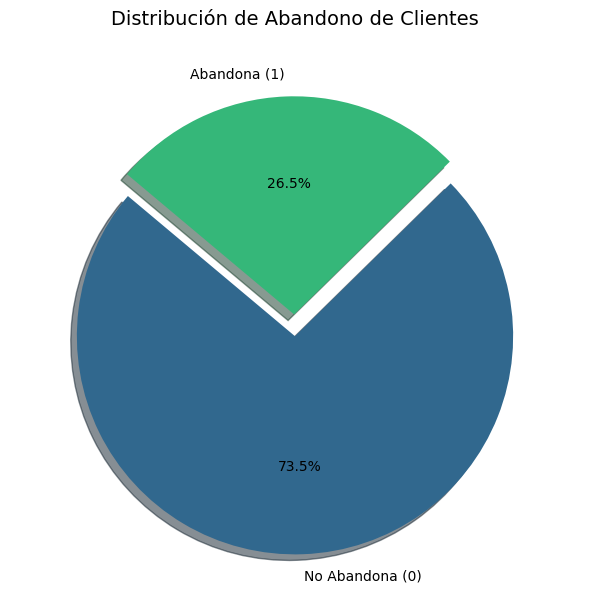

In [284]:
abandono_pie_chart(df_datos)

In [285]:
# Crear tabla final: cantidad y porcentaje de abandono
tabla_abandono = df_datos['abandono'].value_counts().rename({1: 'Abandonó', 0: 'No Abandonó'}).reset_index()
tabla_abandono.columns = ['Estado', 'Cantidad']
tabla_abandono['Porcentaje'] = (tabla_abandono['Cantidad'] / tabla_abandono['Cantidad'].sum() * 100).round(2)

# Mostrar resultado
print(tabla_abandono)

        Estado  Cantidad  Porcentaje
0  No Abandonó      5174       73.46
1     Abandonó      1869       26.54


In [286]:
def hist_abandono_tiempo(df):
    """
    Histograma de meses de contrato para clientes que abandonaron.
    """
    data_filtrada = df[df['abandono'] == 1]['meses_contrato']

    plt.figure(figsize=(10, 5))
    sns.histplot(data=data_filtrada, bins=30, kde=True, color=sns.color_palette("viridis")[3])

    plt.title('Meses de Contrato antes del Abandono', fontsize=14, y=1.08)
    plt.xlabel('Meses de Contrato')
    plt.ylabel('Cantidad de Clientes')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


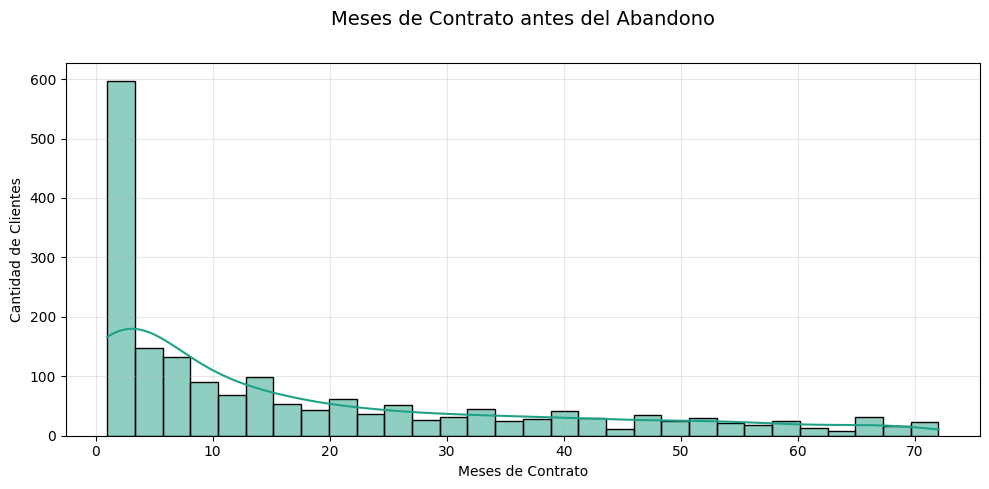

In [287]:
hist_abandono_tiempo(df_datos)

In [288]:
def linea_abandono_tiempo(df):
    """
    Gráfico de línea: cantidad de abandonos por meses de contrato.
    """
    # Filtrar solo clientes que abandonaron
    abandono_df = df[df['abandono'] == 1]

    # Agrupar y contar por meses de contrato
    abandono_por_mes = abandono_df['meses_contrato'].value_counts().sort_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=abandono_por_mes.index, y=abandono_por_mes.values, color=sns.color_palette("viridis")[4], marker="o")

    plt.title('Clientes que Abandonan según Meses de Contrato', fontsize=14, y=1.08)
    plt.xlabel('Meses de Contrato')
    plt.ylabel('Cantidad de Clientes que Abandonaron')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


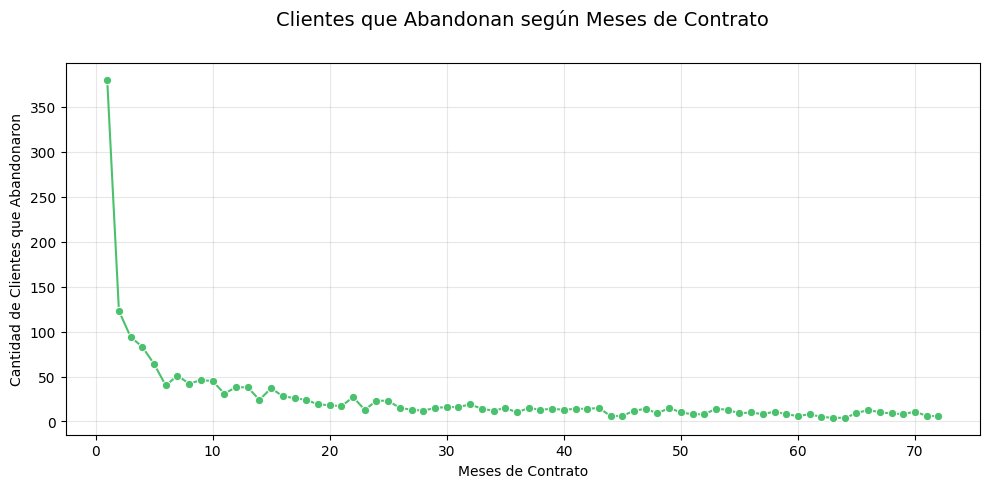

In [289]:
linea_abandono_tiempo(df_datos)

In [290]:
# Agrupar por meses de contrato donde el cliente abandonó
abandono_tiempo = df_datos[df_datos['abandono'] == 1]['meses_contrato'].value_counts().sort_index().reset_index()
abandono_tiempo.columns = ['Meses de Contrato', 'Cantidad de Abandonos']
abandono_tiempo['Porcentaje'] = (
    abandono_tiempo['Cantidad de Abandonos'] / abandono_tiempo['Cantidad de Abandonos'].sum() * 100
).round(2)

# Mostrar tabla
print(abandono_tiempo)

    Meses de Contrato  Cantidad de Abandonos  Porcentaje
0                   1                    380       20.33
1                   2                    123        6.58
2                   3                     94        5.03
3                   4                     83        4.44
4                   5                     64        3.42
..                ...                    ...         ...
67                 68                      9        0.48
68                 69                      8        0.43
69                 70                     11        0.59
70                 71                      6        0.32
71                 72                      6        0.32

[72 rows x 3 columns]


In [291]:
def abandono_por_genero(df):
    """
    Gráfico de barras que muestra el abandono de clientes por género.
    """
    # Filtrar clientes que abandonaron
    abandono_df = df[df['abandono'] == 1]

    # Mapear género a texto
    genero_mapeado = abandono_df['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})

    # Contar abandonos por género
    abandono_por_genero = genero_mapeado.value_counts()

    plt.figure(figsize=(6, 4))
    sns.barplot(x=abandono_por_genero.index, y=abandono_por_genero.values, palette=sns.color_palette("viridis"))

    plt.title('Abandono de Clientes por Género', fontsize=14, y=1.08)
    plt.xlabel('Género')
    plt.ylabel('Cantidad de Abandonos')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-182151209.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abandono_por_genero.index, y=abandono_por_genero.values, palette=sns.color_palette("viridis"))
/tmp/ipython-input-182151209.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=abandono_por_genero.index, y=abandono_por_genero.values, palette=sns.color_palette("viridis"))


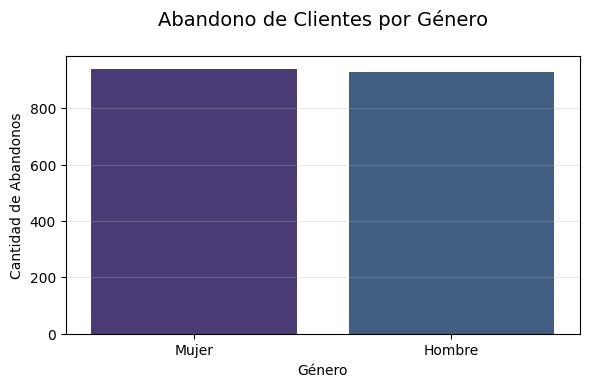

In [292]:
abandono_por_genero(df_datos)

In [293]:
# Crear tabla con el género de los clientes que más abandonan
genero_abandono = df_datos[df_datos['abandono'] == 1]['es_hombre'].map({1: 'Hombre', 0: 'Mujer'}).value_counts().reset_index()
genero_abandono.columns = ['Género', 'Cantidad de Abandonos']
genero_abandono['Porcentaje'] = (
    genero_abandono['Cantidad de Abandonos'] / genero_abandono['Cantidad de Abandonos'].sum() * 100
).round(2)

# Mostrar tabla
print(genero_abandono)

   Género  Cantidad de Abandonos  Porcentaje
0   Mujer                    939       50.24
1  Hombre                    930       49.76


In [294]:
def abandono_genero_edad(df):
    """
    Gráfico de barras agrupadas (en cantidad) del abandono según género y si es adulto mayor.
    """
    # Filtrar clientes que abandonaron
    abandono_df = df[df['abandono'] == 1]

    # Mapear valores a texto para interpretación
    abandono_df['Género'] = abandono_df['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})
    abandono_df['Tercera Edad'] = abandono_df['es_adulto_mayor'].map({1: 'Sí', 0: 'No'})

    # Contar combinaciones
    grupo = abandono_df.groupby(['Género', 'Tercera Edad']).size().reset_index(name='Cantidad')

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Género', y='Cantidad', hue='Tercera Edad', data=grupo, palette=sns.color_palette("viridis"))

    plt.title('Abandono de Clientes por Género y Tercera Edad', fontsize=14, y=1.08)
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel('Género')
    plt.legend(title='¿Tercera Edad?')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-439318486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abandono_df['Género'] = abandono_df['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})
/tmp/ipython-input-439318486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abandono_df['Tercera Edad'] = abandono_df['es_adulto_mayor'].map({1: 'Sí', 0: 'No'})
/tmp/ipython-input-439318486.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='Género', y='Cantidad', hue='Tercera E

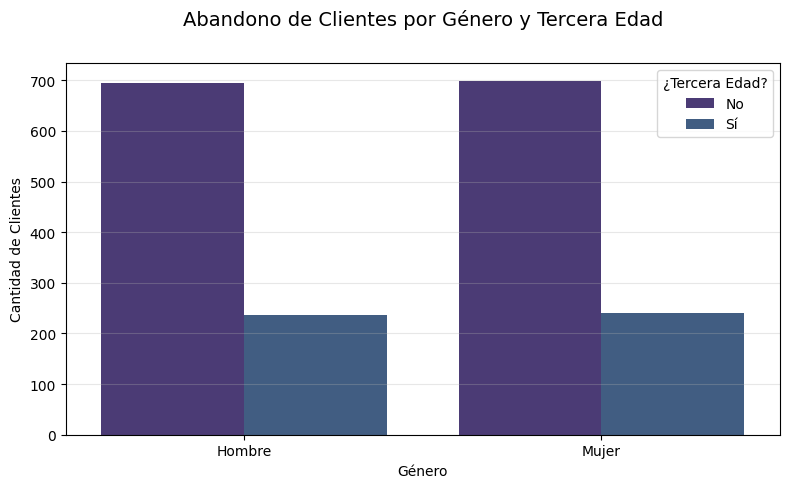

In [295]:
abandono_genero_edad(df_datos)

In [296]:
# Filtrar solo clientes que abandonaron
df_temp = df_datos[df_datos['abandono'] == 1].copy()

# Mapear los campos
df_temp['Género'] = df_temp['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})
df_temp['Tercera Edad'] = df_temp['es_adulto_mayor'].map({1: 'Sí', 0: 'No'})

# Agrupar por género y tercera edad
genero_edad = df_temp.groupby(['Género', 'Tercera Edad']).size().reset_index(name='Cantidad de Abandonos')
genero_edad['Porcentaje'] = (
    genero_edad['Cantidad de Abandonos'] / genero_edad['Cantidad de Abandonos'].sum() * 100
).round(2)

# Mostrar la tabla
print(genero_edad)

   Género Tercera Edad  Cantidad de Abandonos  Porcentaje
0  Hombre           No                    694       37.13
1  Hombre           Sí                    236       12.63
2   Mujer           No                    699       37.40
3   Mujer           Sí                    240       12.84


In [297]:
def abandono_genero_pareja(df):
    """
    Gráfico de barras agrupadas (en cantidad) del abandono según género y si tiene pareja.
    """
    # Filtrar solo los que abandonaron
    abandono_df = df[df['abandono'] == 1]

    # Mapear valores
    abandono_df['Género'] = abandono_df['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})
    abandono_df['Tiene Pareja'] = abandono_df['tiene_pareja'].map({1: 'Sí', 0: 'No'})

    # Agrupar y contar
    grupo = abandono_df.groupby(['Género', 'Tiene Pareja']).size().reset_index(name='Cantidad')

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Género', y='Cantidad', hue='Tiene Pareja', data=grupo, palette=sns.color_palette("viridis"))

    plt.title('Abandono por Género y Estado de Pareja', fontsize=14, y=1.08)
    plt.xlabel('Género')
    plt.ylabel('Cantidad de Clientes que Abandonaron')
    plt.legend(title='¿Tiene Pareja?')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1588296264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abandono_df['Género'] = abandono_df['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})
/tmp/ipython-input-1588296264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abandono_df['Tiene Pareja'] = abandono_df['tiene_pareja'].map({1: 'Sí', 0: 'No'})
/tmp/ipython-input-1588296264.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='Género', y='Cantidad', hue='Tiene Par

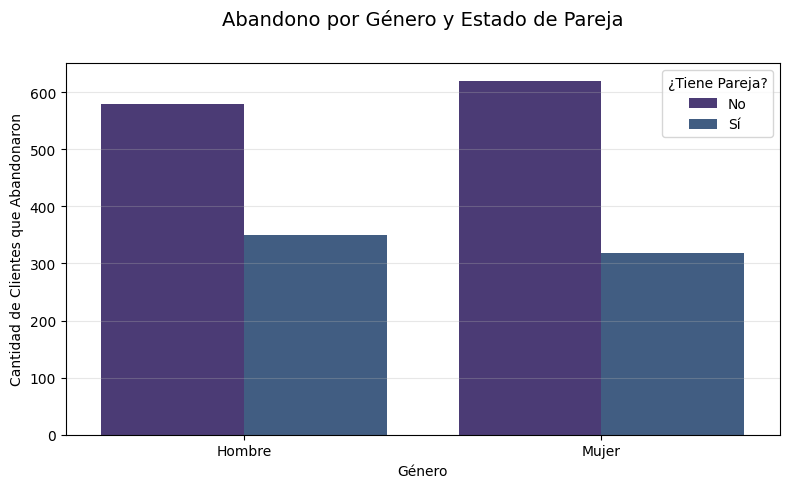

In [298]:
abandono_genero_pareja(df_datos)

In [299]:
# Filtrar clientes que abandonaron
df_temp = df_datos[df_datos['abandono'] == 1].copy()

# Mapear valores
df_temp['Género'] = df_temp['es_hombre'].map({1: 'Hombre', 0: 'Mujer'})
df_temp['Tiene Pareja'] = df_temp['tiene_pareja'].map({1: 'Sí', 0: 'No'})

# Agrupar y calcular
genero_pareja = df_temp.groupby(['Género', 'Tiene Pareja']).size().reset_index(name='Cantidad de Abandonos')
genero_pareja['Porcentaje'] = (
    genero_pareja['Cantidad de Abandonos'] / genero_pareja['Cantidad de Abandonos'].sum() * 100
).round(2)

# Mostrar tabla
print(genero_pareja)

   Género Tiene Pareja  Cantidad de Abandonos  Porcentaje
0  Hombre           No                    580       31.03
1  Hombre           Sí                    350       18.73
2   Mujer           No                    620       33.17
3   Mujer           Sí                    319       17.07


In [300]:
def comparativo_abandono_metodo_pago(df):
    """
    Gráfico comparativo horizontal del método de pago entre clientes que abandonan y no abandonan.
    """
    # Mapear abandono
    df['Estado'] = df['abandono'].map({1: 'Abandona', 0: 'Permanece'})

    # Agrupar por método de pago y estado
    metodo_estado = df.groupby(['metodo_pago', 'Estado']).size().reset_index(name='Cantidad')

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=metodo_estado,
        y='metodo_pago',
        x='Cantidad',
        hue='Estado',
        palette=sns.color_palette("viridis", n_colors=2)
    )

    plt.title('Comparación de Abandono por Método de Pago', fontsize=14, y=1.08)
    plt.ylabel('Método de Pago')
    plt.xlabel('Cantidad de Clientes')
    plt.grid(axis='x', alpha=0.3)
    plt.legend(title='Estado del Cliente', loc='upper right')
    plt.tight_layout()
    plt.show()

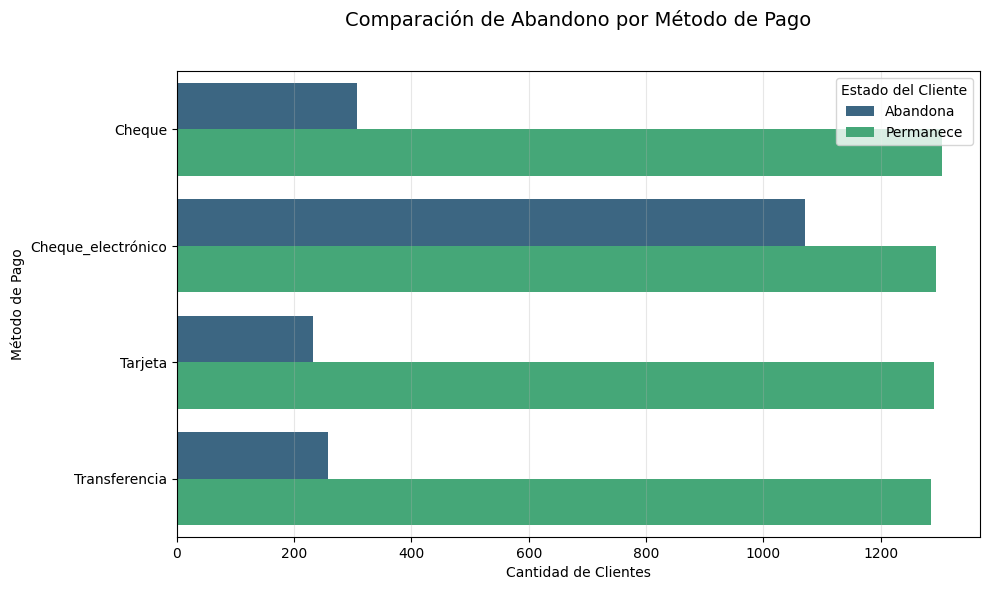

In [301]:
comparativo_abandono_metodo_pago(df_datos)

In [302]:
# Filtrar clientes que abandonaron
df_temp = df_datos[df_datos['abandono'] == 1]

# Agrupar por método de pago
metodo_pago_abandono = df_temp['metodo_pago'].value_counts().reset_index()
metodo_pago_abandono.columns = ['Método de Pago', 'Cantidad de Abandonos']

# Calcular porcentajes
metodo_pago_abandono['Porcentaje'] = (
    metodo_pago_abandono['Cantidad de Abandonos'] / metodo_pago_abandono['Cantidad de Abandonos'].sum() * 100
).round(2)

# Mostrar tabla
print(metodo_pago_abandono)

       Método de Pago  Cantidad de Abandonos  Porcentaje
0  Cheque_electrónico                   1071       57.30
1              Cheque                    308       16.48
2       Transferencia                    258       13.80
3             Tarjeta                    232       12.41


In [303]:
def abandono_por_servicio(df):
    """
    Gráfico de barras horizontales que muestra la cantidad de abandonos según los servicios contratados.
    """
    # Filtrar solo clientes que abandonaron
    churn_df = df[df['abandono'] == 1].copy()

    # Reclasificar tipo_internet: DSL o Fiber optic => 'Sí', resto => 'No'
    churn_df['Internet'] = churn_df['tipo_internet'].apply(lambda x: 'Sí' if x in ['DSL', 'Fiber optic'] else 'No')

    # Columnas a revisar
    servicios = {
        'Internet': churn_df['Internet'],
        'seguridad_online': churn_df['seguridad_online'].map({1: 'Sí', 0: 'No'}),
        'respaldo_online': churn_df['respaldo_online'].map({1: 'Sí', 0: 'No'}),
        'proteccion_dispositivo': churn_df['proteccion_dispositivo'].map({1: 'Sí', 0: 'No'}),
        'soporte_tecnico': churn_df['soporte_tecnico'].map({1: 'Sí', 0: 'No'}),
        'tiene_tv': churn_df['tiene_tv'].map({1: 'Sí', 0: 'No'}),
        'tiene_peliculas': churn_df['tiene_peliculas'].map({1: 'Sí', 0: 'No'}),
        'tiene_telefono': churn_df['tiene_telefono'].map({1: 'Sí', 0: 'No'}),
        'tiene_varias_lineas': churn_df['tiene_varias_lineas'].map({1: 'Sí', 0: 'No'}),
    }

    # Calcular cantidad de abandonos con servicio contratado
    abandono_por_servicio = {
        nombre: (columna == 'Sí').sum()
        for nombre, columna in servicios.items()
    }

    servicio_df = pd.DataFrame(list(abandono_por_servicio.items()), columns=['Servicio', 'Cantidad de Abandonos'])
    servicio_df = servicio_df.sort_values(by='Cantidad de Abandonos', ascending=True)

    servicio_df['Servicio'] = servicio_df['Servicio'].replace({
        'Internet': 'Internet',
        'seguridad_online': 'Seguridad Online',
        'respaldo_online': 'Respaldo Online',
        'proteccion_dispositivo': 'Protección Dispositivo',
        'soporte_tecnico': 'Soporte Técnico',
        'tiene_tv': 'Televisión',
        'tiene_peliculas': 'Películas',
        'tiene_telefono': 'Teléfono',
        'tiene_varias_lineas': 'Múltiples Líneas'
    })

    # Gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(data=servicio_df, x='Cantidad de Abandonos', y='Servicio', palette='viridis')

    plt.title('Abandono según Servicios Contratados', fontsize=14, y=1.08)
    plt.xlabel('Cantidad de Clientes que Abandonaron')
    plt.ylabel('Servicio Contratado')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1831871565.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=servicio_df, x='Cantidad de Abandonos', y='Servicio', palette='viridis')


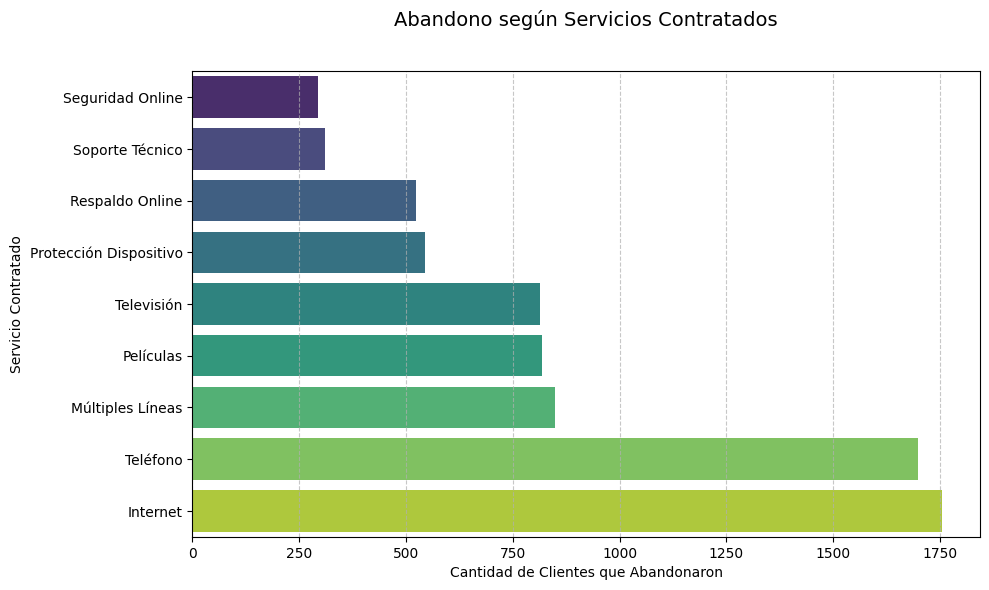

In [304]:
abandono_por_servicio(df_datos)

In [305]:
# Lista de columnas binarias relacionadas a servicios
servicios_binarios = [
    'tiene_telefono', 'tiene_varias_lineas', 'seguridad_online',
    'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
    'tiene_tv', 'tiene_peliculas'
]

# Crear tabla con nombres
servicios_abandono = pd.DataFrame({
    'Servicio': [col.replace('_', ' ').title() for col in servicios_binarios],
    'Cantidad de Abandonos': [df_datos[df_datos['abandono'] == 1][col].sum() for col in servicios_binarios]
})

# Calcular porcentaje
servicios_abandono['Porcentaje'] = (
    servicios_abandono['Cantidad de Abandonos'] / servicios_abandono['Cantidad de Abandonos'].sum() * 100
).round(2)

# Mostrar tabla
print(servicios_abandono)

                 Servicio  Cantidad de Abandonos  Porcentaje
0          Tiene Telefono                   1699       29.02
1     Tiene Varias Lineas                    850       14.52
2        Seguridad Online                    295        5.04
3         Respaldo Online                    523        8.93
4  Proteccion Dispositivo                    545        9.31
5         Soporte Tecnico                    310        5.30
6                Tiene Tv                    814       13.91
7         Tiene Peliculas                    818       13.97


In [306]:
def comparativo_servicios(df):
    """
    Gráfico comparativo que muestra cuántos clientes con cada servicio abandonan o permanecen.
    """
    # Copia del dataframe para comparar
    df_copy = df.copy()
    df_copy['Estado'] = df_copy['abandono'].map({1: 'Abandona', 0: 'Permanece'})
    df_copy['Internet'] = df_copy['tipo_internet'].apply(lambda x: 'Sí' if x in ['DSL', 'Fiber optic'] else 'No')

    # Columnas de servicios
    servicios = {
        'Internet': df_copy['Internet'],
        'seguridad_online': df_copy['seguridad_online'].map({1: 'Sí', 0: 'No'}),
        'respaldo_online': df_copy['respaldo_online'].map({1: 'Sí', 0: 'No'}),
        'proteccion_dispositivo': df_copy['proteccion_dispositivo'].map({1: 'Sí', 0: 'No'}),
        'soporte_tecnico': df_copy['soporte_tecnico'].map({1: 'Sí', 0: 'No'}),
        'tiene_tv': df_copy['tiene_tv'].map({1: 'Sí', 0: 'No'}),
        'tiene_peliculas': df_copy['tiene_peliculas'].map({1: 'Sí', 0: 'No'}),
        'tiene_telefono': df_copy['tiene_telefono'].map({1: 'Sí', 0: 'No'}),
        'tiene_varias_lineas': df_copy['tiene_varias_lineas'].map({1: 'Sí', 0: 'No'}),
    }

    # Contar para cada servicio, cuántos clientes (por Estado) tienen el servicio = 'Sí'
    filas = []
    for nombre, columna in servicios.items():
        temp_df = pd.DataFrame({
            'Servicio': nombre,
            'Estado': df_copy['Estado'],
            'TieneServicio': columna
        })
        conteo = temp_df[temp_df['TieneServicio'] == 'Sí'].groupby('Estado').size().reset_index(name='Cantidad')
        conteo['Servicio'] = nombre
        filas.append(conteo)

    servicio_df = pd.concat(filas, axis=0)

    # Renombrar servicios
    servicio_df['Servicio'] = servicio_df['Servicio'].replace({
        'Internet': 'Internet',
        'seguridad_online': 'Seguridad Online',
        'respaldo_online': 'Respaldo Online',
        'proteccion_dispositivo': 'Protección Dispositivo',
        'soporte_tecnico': 'Soporte Técnico',
        'tiene_tv': 'Televisión',
        'tiene_peliculas': 'Películas',
        'tiene_telefono': 'Teléfono',
        'tiene_varias_lineas': 'Múltiples Líneas'
    })

    # Ordenar servicios según cantidad total
    orden = servicio_df.groupby('Servicio')['Cantidad'].sum().sort_values(ascending=True).index
    servicio_df['Servicio'] = pd.Categorical(servicio_df['Servicio'], categories=orden, ordered=True)

    plt.figure(figsize=(10, 7))
    sns.barplot(data=servicio_df, y='Servicio', x='Cantidad', hue='Estado', palette=sns.color_palette("viridis", n_colors=2))

    plt.title('Comparación de Clientes con Servicios Contratados', fontsize=14, y=1.08)
    plt.xlabel('Cantidad de Clientes con el Servicio')
    plt.ylabel('Servicio')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.legend(title='Estado del Cliente', loc='lower right')
    plt.tight_layout()
    plt.show()

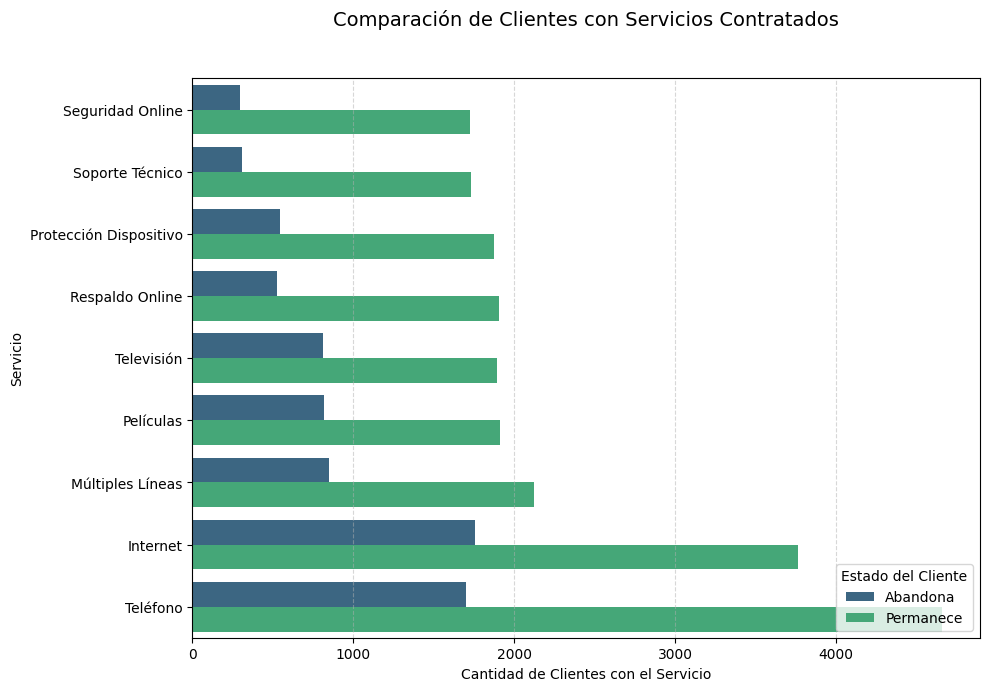

In [307]:
comparativo_servicios(df_datos)

In [308]:
def box_costo_vs_abandono(df):
    """
    Boxplot del costo mensual comparado entre clientes que abandonan y no.
    Permite ver si el abandono se relaciona con precios altos.
    """
    # Mapear columna 'abandono'
    df['Estado'] = df['abandono'].map({1: 'Abandona', 0: 'Permanece'})

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Estado', y='cargo_mensual', palette=sns.color_palette("viridis", n_colors=2))

    plt.title('Comparación de Costo Mensual entre Clientes que Abandonan y No', fontsize=14, y=1.08)
    plt.xlabel('Estado del Cliente')
    plt.ylabel('Costo Mensual ($)')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-4268978412.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Estado', y='cargo_mensual', palette=sns.color_palette("viridis", n_colors=2))


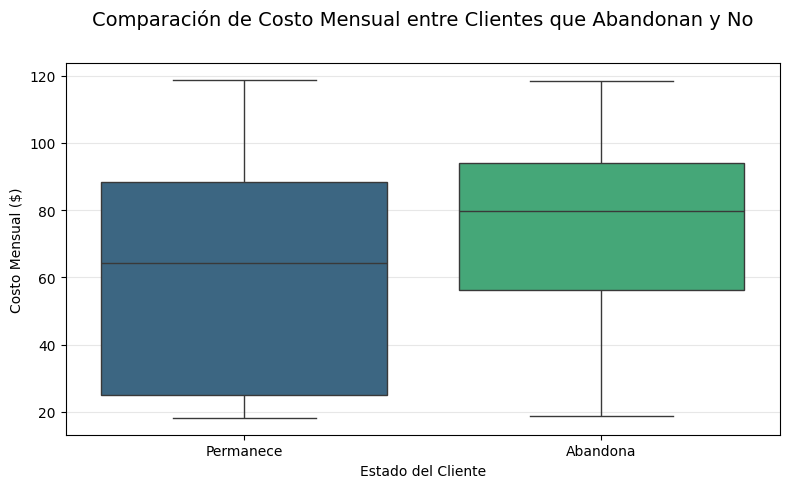

In [309]:
box_costo_vs_abandono(df_datos)

In [310]:
def distribucion_costo_vs_abandono(df):
    """
    Histograma para comparar la distribución del costo mensual entre clientes que abandonan y no.
    """
    df['Estado'] = df['abandono'].map({1: 'Abandona', 0: 'Permanece'})

    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x='cargo_mensual',
        hue='Estado',
        element='step',
        stat='density',
        kde=True,
        common_norm=False,
        palette=sns.color_palette("viridis", n_colors=2),
        bins=30,
        alpha=0.6
    )

    plt.title('Distribución del Costo Mensual según Abandono', fontsize=14, y=1.08)
    plt.xlabel('Costo Mensual ($)')
    plt.ylabel('Densidad')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


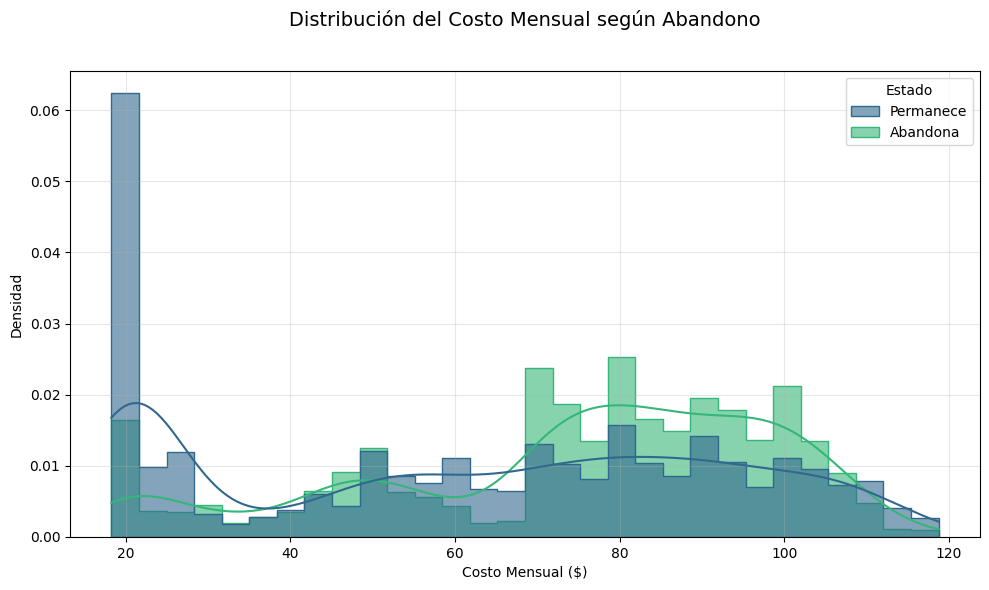

In [311]:
distribucion_costo_vs_abandono(df_datos)

In [312]:
def kde_costo_mensual_abandono(df):
    """
    Gráfico de costo mensual para comparar densidad entre clientes que abandonaron y no.
    """
    # Etiquetas
    df['Estado'] = df['abandono'].map({1: 'Abandonó', 0: 'No Abandonó'})

    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=df[df['Estado'] == 'No Abandonó'],
        x='cargo_mensual',
        fill=True,
        label='No Abandonó',
        linewidth=1.5,
        color=sns.color_palette("viridis")[1]
    )
    sns.kdeplot(
        data=df[df['Estado'] == 'Abandonó'],
        x='cargo_mensual',
        fill=True,
        label='Abandonó',
        linewidth=1.5,
        color=sns.color_palette("viridis")[4]
    )

    plt.title('Distribución de Costo Mensual según Abandono', fontsize=14, y=1.08)
    plt.xlabel('Costo Mensual ($)')
    plt.ylabel('Densidad')
    plt.legend(title='Estado del Cliente')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


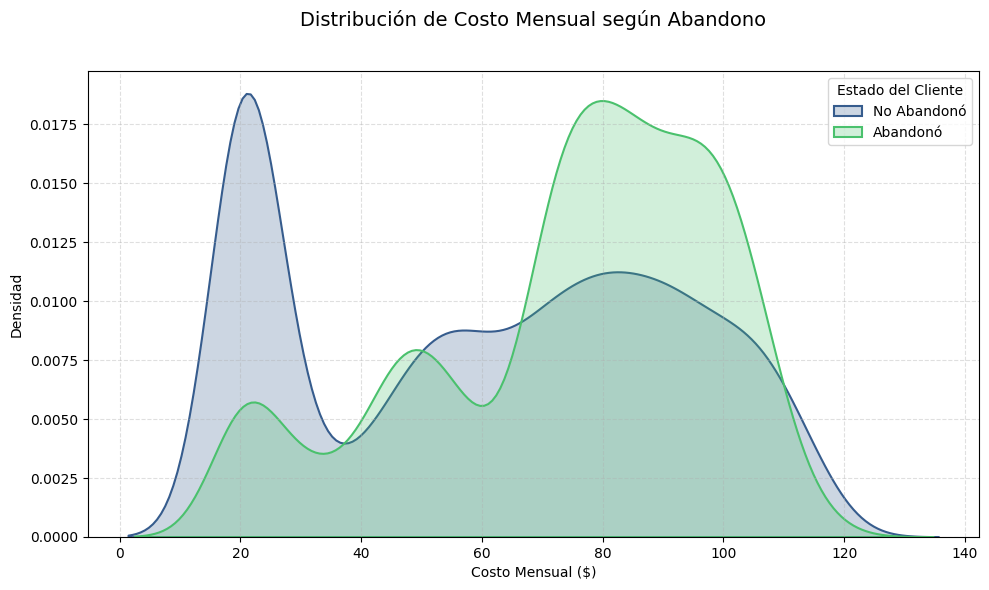

In [313]:
kde_costo_mensual_abandono(df_datos)

In [314]:
def cuentas_diarias_vs_abandono(df):
    """
    Gráfico para comparar la distribución de cuentas diarias entre clientes que abandonan y no.
    """
    # Etiquetas
    df['Estado'] = df['abandono'].map({1: 'Abandonó', 0: 'No Abandonó'})

    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=df[df['Estado'] == 'No Abandonó'],
        x='cuentas_diarias',
        fill=True,
        label='No Abandonó',
        linewidth=1.5,
        color=sns.color_palette("viridis")[1]
    )
    sns.kdeplot(
        data=df[df['Estado'] == 'Abandonó'],
        x='cuentas_diarias',
        fill=True,
        label='Abandonó',
        linewidth=1.5,
        color=sns.color_palette("viridis")[4]
    )

    plt.title('Distribución de Cuenta Diaria según Abandono', fontsize=14, y=1.08)
    plt.xlabel('Cuenta Diaria ($/día)')
    plt.ylabel('Densidad')
    plt.legend(title='Estado del Cliente')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


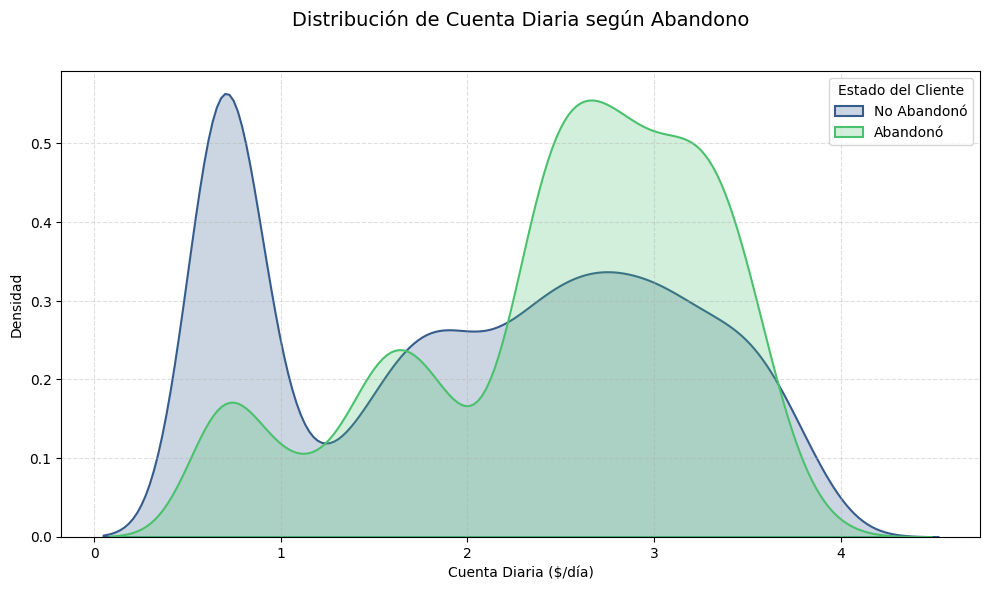

In [315]:
cuentas_diarias_vs_abandono(df_datos)

In [316]:
# Asegurar que existe la columna cantidad_servicios
if 'cantidad_servicios' not in df_datos.columns:
    columnas_servicios = [
        'tiene_telefono', 'tiene_varias_lineas', 'seguridad_online',
        'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
        'tiene_tv', 'tiene_peliculas'
    ]
    df_datos['cantidad_servicios'] = df_datos[columnas_servicios].sum(axis=1)

# Agrupar
servicios_abandono = df_datos[df_datos['abandono'] == 1]['cantidad_servicios'].value_counts().sort_index().reset_index()
servicios_abandono.columns = ['Cantidad de Servicios', 'Cantidad de Abandonos']
servicios_abandono['Porcentaje'] = (
    servicios_abandono['Cantidad de Abandonos'] / servicios_abandono['Cantidad de Abandonos'].sum() * 100
).round(2)

print(servicios_abandono)

   Cantidad de Servicios  Cantidad de Abandonos  Porcentaje
0                      0                     35        1.87
1                      1                    359       19.21
2                      2                    390       20.87
3                      3                    352       18.83
4                      4                    289       15.46
5                      5                    232       12.41
6                      6                    152        8.13
7                      7                     49        2.62
8                      8                     11        0.59


In [317]:
def abandono_por_tipo_contrato(df):
    """
    Gráfico de barras horizontales del abandono por tipo de contrato.
    """
    # Filtrar solo los que abandonaron
    abandono_df = df[df['abandono'] == 1]

    # Agrupar y contar por tipo de contrato
    contrato_abandono = abandono_df['tipo_contrato'].value_counts().reset_index()
    contrato_abandono.columns = ['Tipo de Contrato', 'Cantidad de Abandonos']
    contrato_abandono = contrato_abandono.sort_values(by='Cantidad de Abandonos', ascending=True)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=contrato_abandono,
        y='Tipo de Contrato',
        x='Cantidad de Abandonos',
        palette=sns.color_palette("viridis", n_colors=len(contrato_abandono))
    )

    plt.title('Abandono de Clientes por Tipo de Contrato', fontsize=14, y=1.08)
    plt.xlabel('Cantidad de Abandonos')
    plt.ylabel('Tipo de Contrato')
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2313594834.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


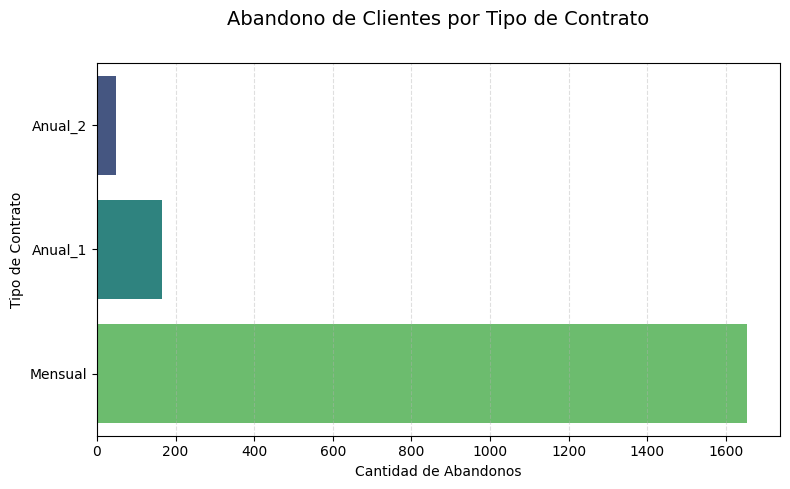

In [318]:
abandono_por_tipo_contrato(df_datos)

In [319]:
contrato_abandono = df_datos[df_datos['abandono'] == 1]['tipo_contrato'].value_counts().reset_index()
contrato_abandono.columns = ['Tipo de Contrato', 'Cantidad de Abandonos']
contrato_abandono['Porcentaje'] = (
    contrato_abandono['Cantidad de Abandonos'] / contrato_abandono['Cantidad de Abandonos'].sum() * 100
).round(2)

print(contrato_abandono)

  Tipo de Contrato  Cantidad de Abandonos  Porcentaje
0          Mensual                   1655       88.55
1          Anual_1                    166        8.88
2          Anual_2                     48        2.57


#📄Informe final

##Introduccion

Este informe tiene como propósito analizar los factores asociados a la fuga de clientes en Telecom X, con el objetivo de identificar patrones de abandono y proponer acciones orientadas a la retención. A través de un análisis exploratorio de los datos, se examinan variables relacionadas con el comportamiento del cliente, los servicios contratados, el perfil sociodemográfico y los métodos de pago utilizados. Esta información permitirá generar recomendaciones estratégicas para reducir la pérdida de clientes y mejorar la experiencia del usuario.

##Limpieza y Tratamiento de Datos:

## 1. Importación de los datos
- Se utilizó un archivo `.json` alojado en GitHub, importado mediante su URL pública.
- Las columnas anidadas (`customer`, `phone`, `internet`, `account`) fueron normalizadas utilizando `pd.json_normalize()`.
- Los DataFrames fueron combinados en un único DataFrame final (`df_datos`)

---

## 2. Limpieza de datos
- Se identificaron y convirtieron campos mal formateados como `Charges.Total`, reemplazando espacios vacíos por `NaN` y luego convirtiendo a `float`.
- Los valores `NaN` en `Charges.Total` fueron reemplazados por `0`.
- Se eliminaron **224 registros** con valor vacío en la columna `Churn` (3% del total).
- Se verificaron duplicados y se limpiaron si era necesario.
- Se revisaron y ajustaron los tipos de datos en todas las columnas.

---

## 3. Estandarización de valores
- Se transformaron valores textuales como `"Yes"` / `"No"` en valores binarios (`1` y `0`).
- La columna `Churn` fue renombrada como `abandono`, con `1` para clientes que abandonaron y `0` para los que permanecen.
- Se tradujeron y renombraron columnas para mayor claridad (ejemplo: `PhoneService` → `tiene_telefono`).

---

## 4. Transformaciones adicionales
- Se creó la columna `cuentas_diarias`, calculada como:  
  \(`cargo_mensual` / 30\)
- Se añadió la columna `cantidad_servicios`, que representa la suma de todos los servicios contratados por cliente.
- Se generaron columnas auxiliares interpretables:
  - `tiene_internet_real` → 1 si el servicio es DSL o fibra óptica

---

## 5. Preparación para análisis
- Se generaron tablas resumen:
  - Porcentaje de abandono
  - Abandono por tiempo (`meses_contrato`)
  - Abandono por género, tercera edad y estado de pareja
  - Abandono por método de pago y tipo de contrato
  - Abandono según cantidad de servicios contratados

- Se generaron gráficos reutilizables usando funciones con:
  - Paleta de colores **Viridis**
  - Títulos bien espaciados y etiquetas

- Se analizaron correlaciones usando:
  - Gráficos de densidad (`kdeplot`)
  - Diagramas de caja (`boxplot`)
  - Barras (`barplot`)

---


##Observaciones

### 1. Abandono por tiempo de permanencia

El análisis revela que la mayoría de los clientes que abandonan lo hacen durante los primeros meses del servicio. De hecho, el **20,3% de las fugas ocurre en el primer mes de contratación**, lo que representa un punto crítico en la relación con el cliente. En los meses siguientes, el porcentaje de abandono disminuye gradualmente:

- 2º mes: 6,6%  
- 3º mes: 5,0%  
- 4º mes: 4,4%

Esto indica que el principal riesgo de fuga ocurre al inicio de la experiencia, lo que sugiere la necesidad de **fortalecer las acciones de onboarding y soporte durante el primer mes**.


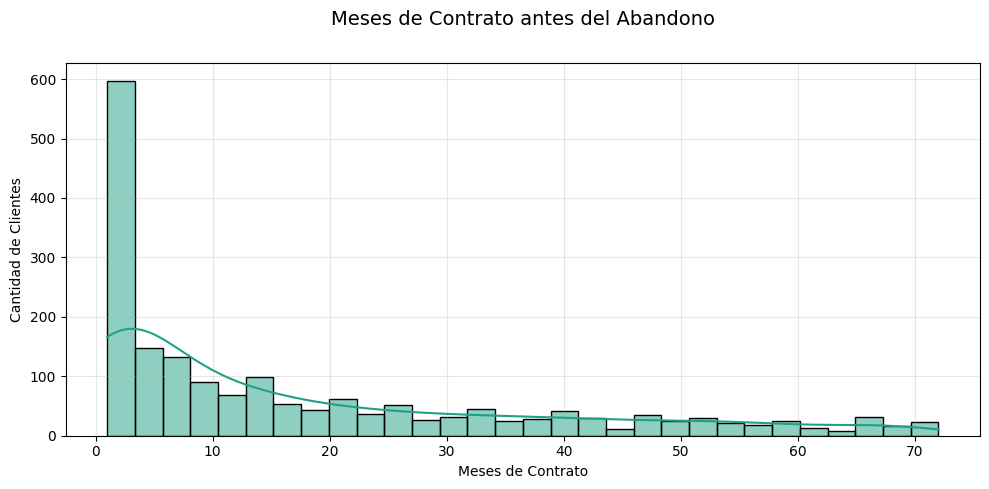
---

### 2. Diferencias de abandono entre géneros

El abandono se distribuye de manera bastante equilibrada entre hombres y mujeres. Aunque el número de mujeres que abandonan es levemente superior (**9 casos más**), esta diferencia es **marginal** considerando un universo de **1.869 usuarios**. No se identifican sesgos de género relevantes en la fuga.

---


### 3. Abandono en adultos mayores

La población mayor de 65 años muestra una **menor tasa de abandono** en comparación con los adultos jóvenes. Del total de abandonos:

- Hombres adultos mayores: 12,6%  
- Hombres menores de 65 años: 37,1%  
- Mujeres adultas mayores: 12,8%  
- Mujeres menores de 65 años: 37,4%

Esto indica que **los adultos mayores tienden a ser más fieles al servicio**, sin diferencias significativas entre géneros.

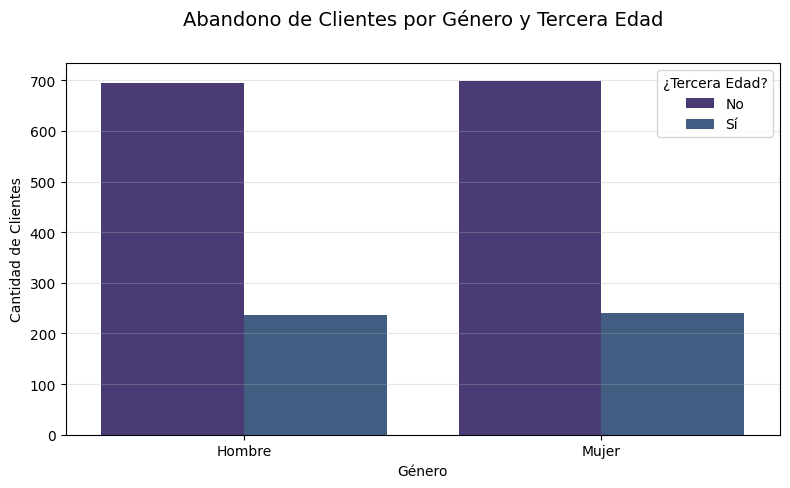
---

### 4. Influencia de la vida en pareja

El estado de pareja también parece incidir en la probabilidad de abandono. Se observa una **mayor tasa de fuga en clientes que no tienen pareja**, tanto en hombres como en mujeres:

- Hombres sin pareja: 31,0%  
- Hombres con pareja: 18,7%  
- Mujeres sin pareja: 33,2%  
- Mujeres con pareja: 17,1%

Esto sugiere que quienes cuentan con un entorno de apoyo emocional o familiar presentan mayor estabilidad en sus decisiones de consumo.


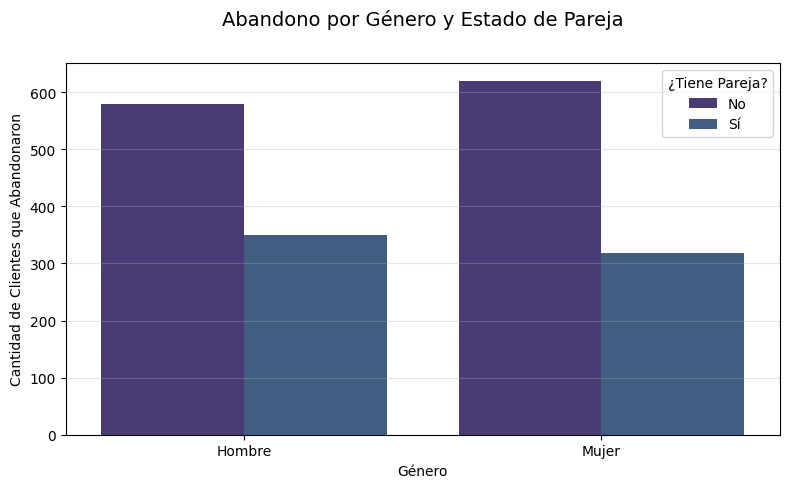
---


### 5. Servicios más asociados al abandono

Entre los clientes que abandonan, los servicios más comúnmente contratados son:

1. Internet: 1.756 clientes  
2. Teléfono: 1.699 clientes  
3. Múltiples líneas: 850 clientes  
4. Streaming de películas: 818 clientes  
5. Streaming de TV: 814 clientes  
6. Protección de dispositivos: 545 clientes

Esto indica que **la mayoría de los usuarios que abandonan son clientes con múltiples servicios activos**, lo que puede estar vinculado a una percepción de alto costo o baja satisfacción con el paquete.

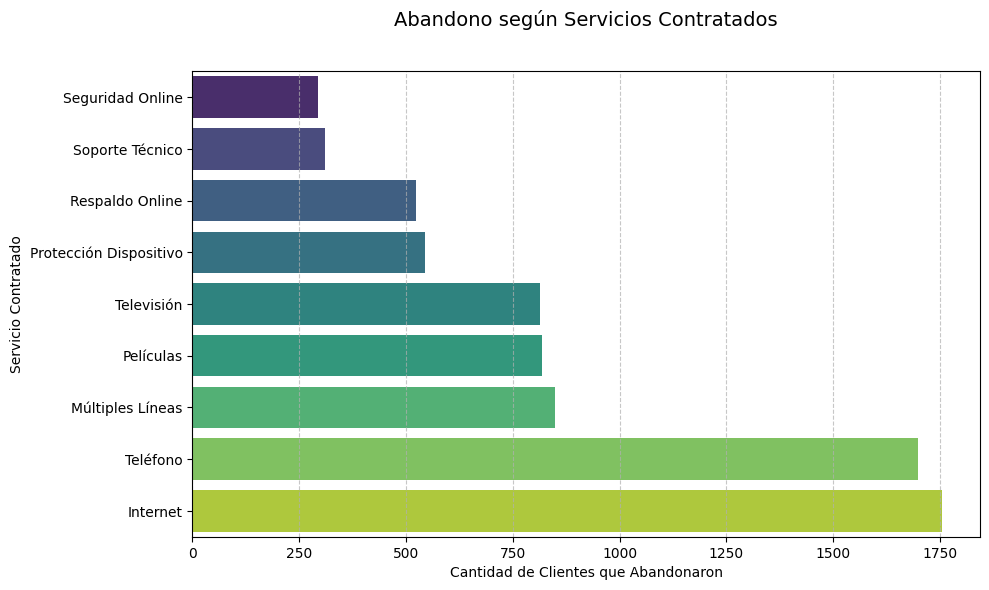
---

### 6. Relación entre método de pago y abandono

Los métodos de pago también muestran diferencias claras en relación con la fuga de clientes:

- Cheque Electrónico: 57,3%  
- Cheque: 16,5%  
- Transferencia: 13,8%  
- Tarjeta: 12,4%

Los métodos menos automatizados parecen estar **asociados a una mayor tasa de abandono**, lo que podría reflejar menor compromiso del cliente o mayor facilidad para cancelar el servicio.

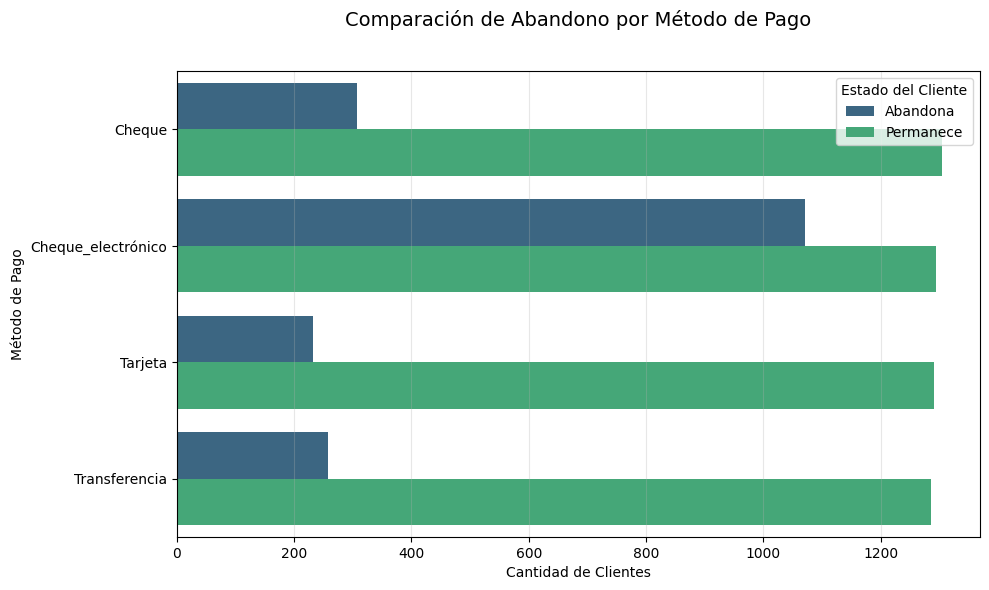
---

### 7. Costo mensual y abandono

Los gráficos de distribución y boxplot revelan que los clientes que abandonan **tienden a pagar cargos mensuales más altos** en comparación con los que se quedan. Esto sugiere que el **precio percibido puede ser un factor decisivo** en la decisión de cancelar.

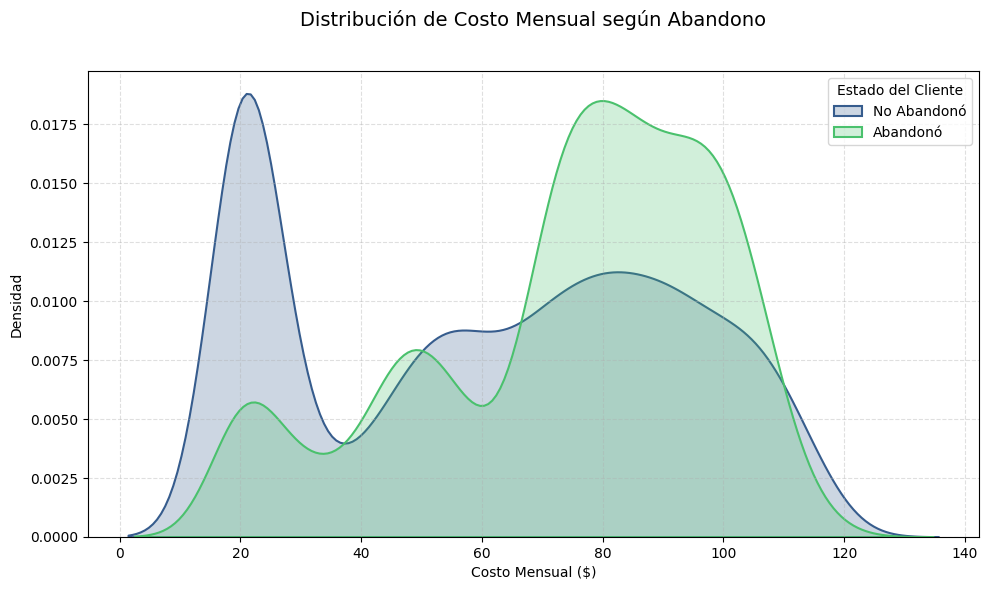!
---


 ## Conclusiones e Insights

 - El **primer mes de contrato** es el momento más crítico: invertir en onboarding y retención temprana puede reducir más del 20% de la fuga.
- No hay diferencias de género significativas, pero el **estado civil** y la **edad** sí afectan la retención.
- **Clientes con múltiples servicios y costos elevados** son más propensos a abandonar: se recomienda revisar estos paquetes o segmentar con precios escalonados.
- El método de pago actúa como un **indicador de compromiso**: medios más tradicionales o no automáticos correlacionan con mayor abandono.
- Las decisiones de cancelación parecen estar influenciadas por una **combinación de precio, simplicidad de pago y carga emocional**, lo que abre oportunidades para personalizar la estrategia de retención más allá de lo técnico.

## Recomendaciones

Con base en el análisis realizado, se proponen las siguientes recomendaciones:

- Implementar **acciones de fidelización temprana** durante el primer mes, como bienvenida personalizada, beneficios exclusivos o soporte activo.
- Diseñar campañas de retención **dirigidas a clientes sin pareja**, quienes presentan mayor propensión al abandono.
- Evaluar y optimizar la experiencia de uso de **servicios clave como internet y telefonía**, que concentran la mayor fuga.
- Incentivar el uso de **métodos de pago automáticos**, como tarjetas o transferencias bancarias, mediante descuentos o beneficios exclusivos.
- Analizar posibles **estrategias de ajuste de precios o segmentación** para clientes con múltiples servicios y cargos elevados, especialmente en los primeros meses del contrato.

---